### Clone the repository

In [1]:
!git clone https://github.com/imneonizer/How-to-find-if-an-image-is-bright-or-dark.git

Cloning into 'How-to-find-if-an-image-is-bright-or-dark'...
remote: Enumerating objects: 82, done.
remote: Counting objects: 100% (30/30), done.
remote: Compressing objects: 100% (30/30), done.
remote: Total 82 (delta 1), reused 28 (delta 0), pack-reused 52 (from 1)
Receiving objects: 100% (82/82), 26.41 MiB | 22.46 MiB/s, done.
Resolving deltas: 100% (13/13), done.


### Import necessary Modules

In [2]:
import os
import glob
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### Function to calculate brightness

In [9]:
def isbright(image, dim=10, thresh=0.3):
    # Resize image to 10x10
    image = cv2.resize(image, (dim, dim))
    # Convert color space to LAB format and extract L channel
    L, A, B = cv2.split(cv2.cvtColor(image, cv2.COLOR_BGR2LAB))
    # Normalize L channel by dividing all pixel values with maximum pixel value
    L = L/np.max(L)
    # Return True if mean is greater than thresh else False
    return np.mean(L)

### Find if image is bright or dark

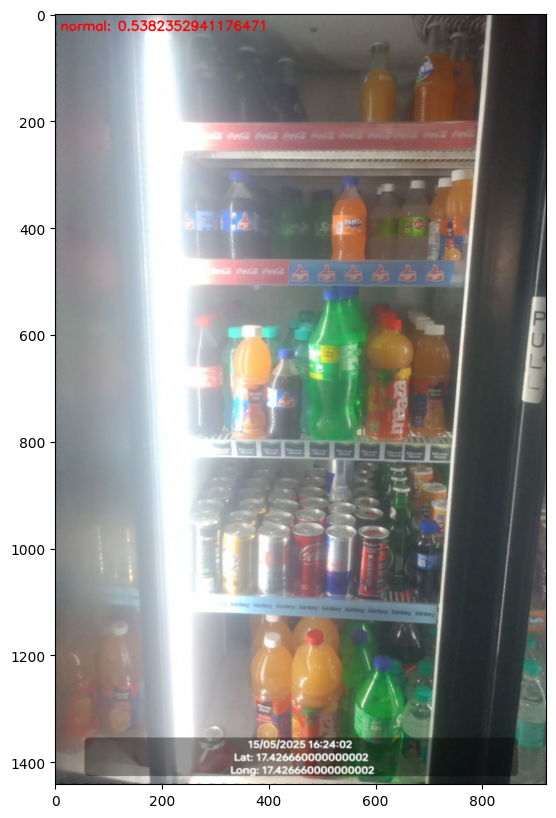

In [13]:
# load image freom disk
image = cv2.imread("/content/78b8ee48-7923-4e82-8312-86b29321d127_1.jpg")

val = isbright(image)
if val > 0.7:
  text = "bright"
elif val < 0.3:
  text = "dark"
else:
  text = "normal"
# text = "bright" if isbright(image) else "dark"

# write text on image
cv2.putText(image, "{}: {}".format(text, val), (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 0.8, (0, 0, 255), 2)

# show image
plt.figure(figsize=(10,10))
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.show()